<a href="https://colab.research.google.com/github/filipeaguiarrod/Statistics/blob/main/Practical_case/Hypothesis_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def ecdf(a):
  x = np.sort(a)
  y = np.arange(len(x))/float(len(x))
  return x,y

# Hypothesis Tests

Assessment of how reasonable the observed data are
assuming a hypothesis is true

- Ho = Summary Statistics are the same / Distributions are the same
- Ha = """ are not the same 

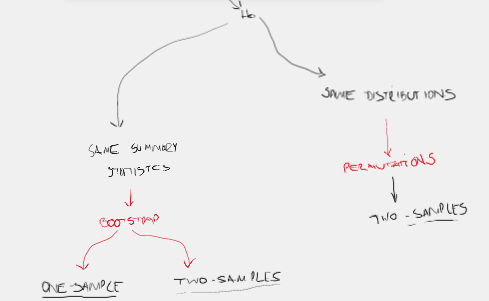

## Permutation (Embaralhar)

In the video, you learned that permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions.

In [4]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

Example of Hypothesis Test: The rain distributions are the same in  June and November. How to test it ? 

In [5]:
rain_june = np.array([ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])

rain_november = np.array([ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8])

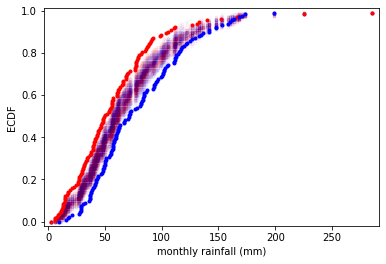

In [6]:
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june,rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

# Generating Permutation Replicates

In [7]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

### Testing function permuting and permuting replicates

In [8]:
ar_1 = np.arange(0,10)
ar_2= np.arange(0,15)

In [9]:
permutation_sample(ar_1,ar_2)

(array([ 1,  9,  5,  8,  3, 13, 14,  1,  4,  3]),
 array([12,  4,  2,  0,  7,  7, 10, 11,  6,  8,  6,  2,  0,  5,  9]))

## Hypothesis test examples with Frog data

In [10]:
#Example Frog:
# Frog Tongue's force 

force_a = np.array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 ])
force_b = np.array([0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502, 0.273, 0.72 ,
       0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402, 0.605, 0.711,
       0.614, 0.468])
force_c = 0.55

### Permuation - Two Samples

Ho - The forces distribution for frog A and frog B are the same

In [11]:
np.mean(force_a)-np.mean(force_b)

0.28825000000000006

In [12]:
x_1,y_1 = ecdf(force_a)
x_2,y_2 = ecdf(force_b) 

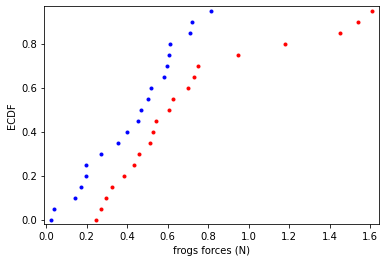

In [13]:
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('frogs forces (N)')
_ = plt.ylabel('ECDF')
plt.show()

In [14]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = np.mean(force_a)-np.mean(force_b) #Baseline

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 func=diff_of_means, size=10000)

In [15]:
# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0047


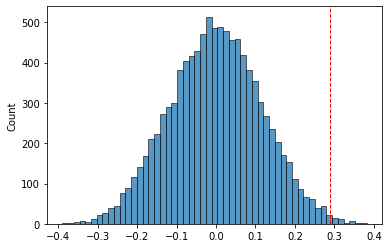

In [16]:
_ = sns.histplot(perm_replicates)
_= plt.axvline(empirical_diff_means, color='red', linestyle='dashed', linewidth=1)
plt.show()

'''FAzendo a permutação e as amostrar eu simulo que os sapos são iguais, dessa forma consigo um histograma mostrando possíveis diferenças (distribuição de diferenças) no 
caso simulado dos sapos iguais, quando ploto os grupos (baseline) observo que apenas 0.5% de chance dessa diferença pertencer a uma amostra com sapos iguais. 
POr isso quanto menor o p-valor, maior a chance de serem diferentes'''

The p-value tells you that there is about a 0.6% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant," but: warning! warning! warning! You have computed a p-value; it is a number. I encourage you not to distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 are both said to be "statistically significant," but they are definitely not the same!

## A/B Test

The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, you will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

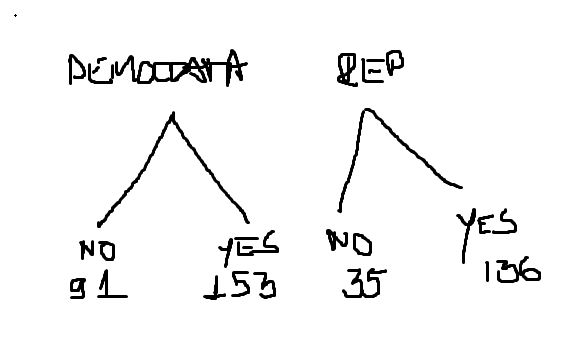

In [17]:
def diff_frac(data_a,data_b):
  
    frac_a = np.sum(data_a) / len(data_a)
    frac_b = np.sum(data_b)/ len(data_b)
    
    return frac_b-frac_a

In [18]:
# Array com dados True e False

dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

In [19]:
def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = sum(dems==True) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, size=10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0


In [21]:
diff_frac(dems, reps)

0.1682724570990317

In [20]:
perm_replicates = draw_perm_reps(dems, reps, diff_frac, size=10000)

# Bootstrap

## A one-sample bootstrap hypothesis test
Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.

To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. You first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.


In [ ]:
force_b.mean()

0.4191000000000001

In [ ]:
x,y = ecdf(force_b)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


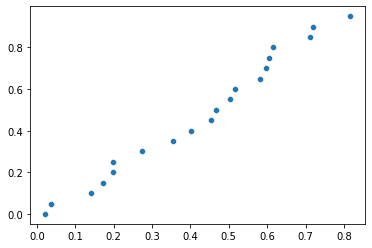

In [ ]:
sns.scatterplot(x,y)

Modify force_b with mean of frog C, to simulate real condition

In [ ]:
translated_force_b = force_b - np.mean(force_b) + 0.55
translated_force_b

array([0.3029, 0.2729, 0.1679, 0.5839, 0.4859, 0.1529, 0.6329, 0.4039,
       0.8509, 0.7129, 0.3289, 0.3289, 0.7279, 0.6469, 0.9459, 0.5329,
       0.7359, 0.8419, 0.7449, 0.5989])

In [ ]:
x_t,y_t = ecdf(translated_force_b)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


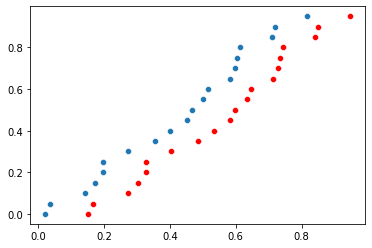

In [ ]:
_ = sns.scatterplot(x,y)
_ = sns.scatterplot(x_t,y_t,color='red')


In [ ]:
def bootstrap_replicate_1d(data, func):

  """Generate bootstrap replicate of 1D data."""

  bs_sample = np.random.choice(data, len(data))
  return func(bs_sample)


In [ ]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data=data,func=func)

    return bs_replicates

In [ ]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55 # Fixing the drift in mean

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p )

p =  0.0064


## A two-sample bootstrap hypothesis test for difference of means

We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution, which is also impossible with a permutation test.


In [ ]:
# Compute mean of all forces: mean_force
mean_force = np.mean(np.concatenate((force_a,force_b)))

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted , np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = sum(bs_replicates>=(np.mean(force_a)-np.mean(force_b))) / 10000
print('p-value =', p)


p-value = 0.0056


## Classes

Some classes to optimize tests

In [ ]:
#Function Two-Sample

class permut_two_sample_p_test:

  """
  Non-parametric - We are not assuming any underlying distribution.

  Because you have the two samples you will perform and permutation test , 
  and assess the hypothesis that for example: "the forces from Frog B and Frog C come from the same distribution."

  1 - Ho - Define the null hypothesis, example the distribution scores in rj are the same as sp

  2 - Define test statistics that will be performed, example: np.mean(rj_scores)-np.mean(sp_scores)

  3 - Many times of simulating data assuming the null hypothesis is true. For one-sample bootstraping and for two-sample permuting data

  4 - Compute test statistics for simulated data sets.

  5 - p value - % of times that observed test statistics are inside simulated test statistics array.   Less p-values higher statistical difference between
  arrays

  ### Args

  data_1, data_2 - datas to test

  func - test statistics, to create null hypothesis, example np.mean(rj_scores)-np.mean(sp_scores)

  size - 1000 by standard. How many times the simulated test statistics will be made. 
  
  """

  def __init__(self, data_1, data_2, func, size=1000, plot = True):

    self.data_1 = data_1
    self.data_2 = data_2
    self.func = func
    self.size = size
    self.plot = plot
    self.empirical_diff_means = self.func(self.data_1, self.data_2)

  #def ecdf(self):
    

  def permutation_sample(self):
      """Generate a permutation sample from two data sets."""

      # Concatenate the data sets: data
      data = np.concatenate((self.data_1,self.data_2))

      # Permute the concatenated array: permuted_data
      permuted_data = np.random.permutation(data)

      # Split the permuted array into two: perm_sample_1, perm_sample_2
      perm_sample_1 = permuted_data[:len(self.data_1)]
      perm_sample_2 = permuted_data[len(self.data_1):]

      return perm_sample_1, perm_sample_2

  def draw_perm_reps(self):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(self.size)

    for i in range(self.size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = self.permutation_sample()

        # Compute the test statistic
        perm_replicates[i] = self.func(perm_sample_1, perm_sample_2)

    return perm_replicates

  def p_value(self):

    self.perm_replicates = self.draw_perm_reps()

    p_value = np.sum(self.perm_replicates >= self.empirical_diff_means) / len(self.perm_replicates)

    if self.plot == True:
      _ = sns.histplot(self.perm_replicates)
      _= plt.axvline(self.empirical_diff_means, color='red', linestyle='dashed', linewidth=1)
      plt.show()

    return print('p = ', p_value )

Example using two_sample_p_test

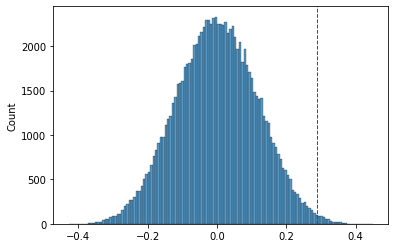

p =  0.00537


In [ ]:
permut_two_sample_p_test(force_a, force_b,size=100000,func=diff_of_means).p_value()

In [ ]:
 #Choose the right statistics to test your data, in this case the difference between means 
  
  def diff_of_means(data_1,data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff  

In [ ]:
#Function Boostraping One-Sample P value

class bs_one_sample_p_test:

  """
  Non-parametric - We are not assuming any underlying distribution.

  It will be used bootstraping once that we just have one of samples, so here we can just test the summary statistics, for example mean, median and etc...
  At the end we could not say that they come from same distribution for example.

  Replicate it's a summary statistics for some bootstraped array.

  1 - Ho - Define the null hypothesis, example the mean scores in rj are the same as sp

  2 - Define test statistics that will be performed, example: np.mean(rj_scores)-np.mean(sp_scores)

  3 - Many times of simulating data assuming the null hypothesis is true. For one-sample bootstraping and for two-sample permuting data

  4 - Compute test statistics for simulated data sets.

  5 - p value - % of times that observed test statistics are inside simulated test statistics array.   Less p-values higher statistical difference between
  arrays

  ### Args

  data_1 - should be and array, observed array values of frog B 
  
  data_2 - should be an unique value, for example mean of frog C forces

  func - test statistics, to create null hypothesis

  size - how many times the simulated test statistics will be made.
  
  """

  def __init__(self,data_1,value_2,func=np.mean,size=10000,plot=True):

    self.data_1 = data_1
    self.value_2 = value_2
    self.func = func
    self.plot = plot
    self.size = size


  def translate_array(self):
      
    # Make an array of translated data_1 with same mean as value_2
    translated_data_1_array = self.data_1 - np.mean(self.data_1) + np.mean(self.value_2) # Fixing the drift in mean
    return translated_data_1_array

  def bootstrap_replicate_1d(self):

    """Generate bootstrap replicate of 1D data."""

    bs_sample = np.random.choice(self.translate_array(), len(self.translate_array()))

    return self.func(bs_sample)


  def draw_bs_reps(self):
    """Draw array of bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(self.size)

    # Generate replicates
    for i in range(self.size):
        bs_replicates[i] = self.bootstrap_replicate_1d()

    return bs_replicates
  

  def p_value(self):

    bs_replicates = self.draw_bs_reps()

    p_value = np.sum(bs_replicates <= self.func(self.data_1)) / self.size

    if self.plot == True:
      _ = sns.histplot(bs_replicates)
      _= plt.axvline(self.func(self.data_1), color='red', linestyle='dashed', linewidth=1)
      plt.show()

    return print('p = ', p_value)

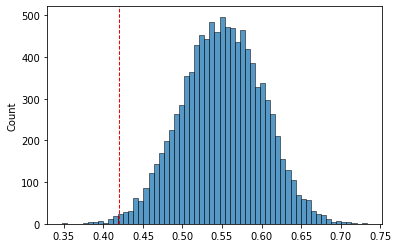

p =  0.0053


In [ ]:
bs_one_sample_p_test(force_b,force_c).p_value()

In [ ]:
#Function Boostraping Two-Sample P value

class bs_two_sample_p_test:

  """
  Non-parametric - We are not assuming any underlying distribution.

  We will use bootstrap so here we can just test the summary statistics, for example mean, median and etc...
  At the end we could not say that they come from same distribution for example.

  Replicate it's a summary statistics for some bootstraped array.

  1 - Ho - Define the null hypothesis, example the mean scores in rj are the same as sp

  2 - Define test statistics that will be performed, example: np.mean(rj_scores)-np.mean(sp_scores)

  3 - Many times of simulating data assuming the null hypothesis is true. For one-sample bootstraping and for two-sample permuting data

  4 - Compute test statistics for simulated data sets.

  5 - p value - % of times that observed test statistics are inside simulated test statistics array.   Less p-values higher statistical difference between
  arrays

  ### Args

  data_1 - should be and array, observed array values of frog B 
  
  data_2 - should be an unique value, for example mean of frog C forces

  func - test statistics, to create null hypothesis

  size - how many times the simulated test statistics will be made.
  
  """

  def __init__(self,data_1,data_2,func=np.mean,size=10000,plot=True):

    self.data_1 = data_1
    self.data_2 = data_2
    self.func = func
    self.size = size
    self.plot = plot
    self.overall_mean = self.func(np.concatenate((data_1,data_2)))


  def translate_array(self):
      
    # Shifiting arrays data_1 and data_2 to represent overall mean
    translated_data_1_array = self.data_1 - np.mean(self.data_1) + self.overall_mean # Fixing the drift in mean
    translated_data_2_array = self.data_2 - np.mean(self.data_2) + self.overall_mean # Fixing the drift in mean

    return translated_data_1_array,translated_data_2_array

  def bootstrap_replicate_1d(self):

    """Generate bootstrap replicate of 1D data."""

    bs_sample_1 = np.random.choice(self.translate_array()[0], len(self.translate_array()[0]))
    bs_sample_2 = np.random.choice(self.translate_array()[1], len(self.translate_array()[1]))

    return self.func(bs_sample_1),self.func(bs_sample_2)


  def draw_bs_reps(self):
    """Draw array of bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates_1 = np.empty(self.size)
    bs_replicates_2 = np.empty(self.size)

    # Generate replicates
    for i in range(self.size):
        bs_replicates_1[i] = self.bootstrap_replicate_1d()[0]
        bs_replicates_2[i] = self.bootstrap_replicate_1d()[1]

    # Get replicates of difference of means: bs_replicates
    bs_replicates = bs_replicates_1 - bs_replicates_2

    return bs_replicates
  

  def p_value(self):

    bs_replicates = self.draw_bs_reps()

    mean_diffs = (np.mean(self.data_1)-np.mean(self.data_2))

    p_value = np.sum(bs_replicates >= mean_diffs) / self.size

    if self.plot == True:
      _ = sns.histplot(bs_replicates)
      _= plt.axvline(mean_diffs, color='red', linestyle='dashed', linewidth=1)
      plt.show()

    return print('p = ', p_value)

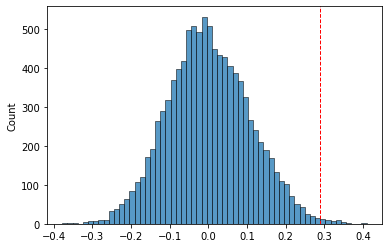

p =  0.0048


In [ ]:
bs_two_sample_p_test(force_a,force_b).p_value()

## A/B - Testing

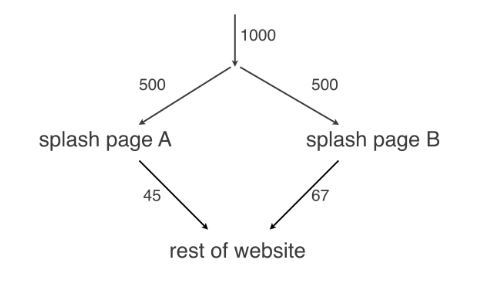

In [ ]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

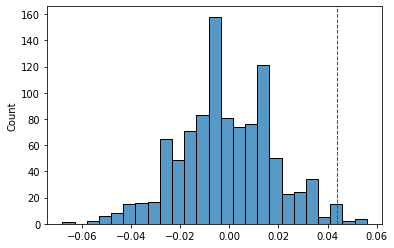

p =  0.021


In [ ]:
permut_two_sample_p_test(screen_a,screen_b,func=diff_frac).p_value()

In [ ]:
def diff_frac(data_A, data_B):
  
  frac_A = np.sum(data_A) / len(data_A)
  frac_B = np.sum(data_B) / len(data_B)
  
  return frac_B - frac_A

In [ ]:
def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = sum(dems==True) / len(dems)
    return frac


In [ ]:
# Construct arrays of data: dems, reps
screen_a = np.array([True] * 45 + [False] * (500-45))
screen_b = np.array([True] * 67 + [False] * (500-67))

In [ ]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = sum(dems==True) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, size=10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)